In [44]:
import pandas as pd
import os
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import normaltest
from scipy.stats import norm
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
sb.set_theme()

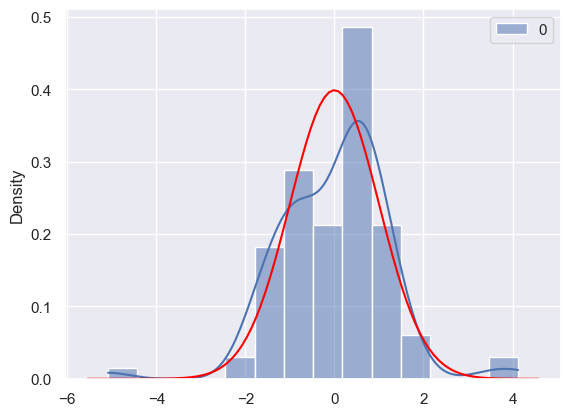

In [195]:
dataset_p2 = pd.read_csv('problem2.csv')
# get first column equals to 1
dataset_p2.insert(loc=0,column='1',value=1)
# OLS method
# convert dataset into matrix
x_p2 = np.matrix(dataset_p2.iloc[:,0:2])
y_p2 = np.matrix(dataset_p2.iloc[:,2:3])

beta_hat =  np.linalg.inv(x_p2.T * x_p2)* (x_p2.T * y_p2)
y_predict = x_p2 * beta_hat
error_vector = y_p2 - y_predict
# print(error_vector)
#plt.hist(error_vector, bins = 20, histtype= '', density=True)
hist_plot = sb.histplot(error_vector, kde = True, stat="density")

xmin, xmax = hist_plot.get_xlim()
normal_x = np.linspace(xmin, xmax, 100)
p = norm.pdf(normal_x)
hist_plot.plot(normal_x, p, color = 'red')

#normal_x = np.random.standard_normal(10)
#normal_y = norm.pdf(normal_x)

#hist_plot.plot(normal_x, normal_y, , label = "pdf")
# normaltest(error_vector)



In [71]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, scalex=True, scaley=True, data=None, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line properties and *fmt* can be mixed.
    The f

In [26]:
help(plt.hist)

Help on function hist in module matplotlib.pyplot:

hist(x, bins=None, range=None, density=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, *, data=None, **kwargs)
    Compute and plot a histogram.
    
    This method uses `numpy.histogram` to bin the data in *x* and count the
    number of values in each bin, then draws the distribution either as a
    `.BarContainer` or `.Polygon`. The *bins*, *range*, *density*, and
    *weights* parameters are forwarded to `numpy.histogram`.
    
    If the data has already been binned and counted, use `~.bar` or
    `~.stairs` to plot the distribution::
    
        counts, bins = np.histogram(x)
        plt.stairs(counts, bins)
    
    Alternatively, plot pre-computed bins and counts using ``hist()`` by
    treating each bin as a single point with a weight equal to its count::
    
        plt.hist(bins[:-1], bins, weights=coun

In [77]:
dataset_p1 = pd.read_csv('problem1.csv')

In [100]:
data1 = np.random.normal(0, 1, 100)
data1 = np.random.normal(0, 1, 1000)


# calculate the skewness using its original definition
def skew_cal(data):
    count = 0
    m = np.mean(data)
    for i in data:
        count += (i - m)**3/len(data)
    count = count/(np.std(data)**3)
    return count

# calculate the difference
skew_result1 = skew_cal(data1) - skew(data1)
skew_result2 = skew_cal(data2) - skew(data2)

print(skew_result1)
print(skew_result2)

# for the skewness
# we can see that the difference is very small, the reason why the result is not exactly 0 is probably because the rounding problem in the steps of calculations.


# calculate the kurtosis using its original definition
def kurtosis_cal(data):
    count = 0
    m = np.mean(data)
    for i in data:
        count += (i - m)**4/len(data)
    count = count/(np.std(data)**4)
    return count

# calculate the difference
kurtosis_result1 = kurtosis_cal(data1) - kurtosis(data1)
kurtosis_result2 = kurtosis_cal(data2) - kurtosis(data2)

print(kurtosis_result1)
print(kurtosis_result2)

0.0
-5.551115123125783e-17
3.0000000000000027
3.0


In [91]:
np.std(data1)

1.1410710095194738

Optimization terminated successfully.
         Current function value: 162.272623
         Iterations: 5
         Function evaluations: 24
         Gradient evaluations: 8
[0.18605839 0.55591619]


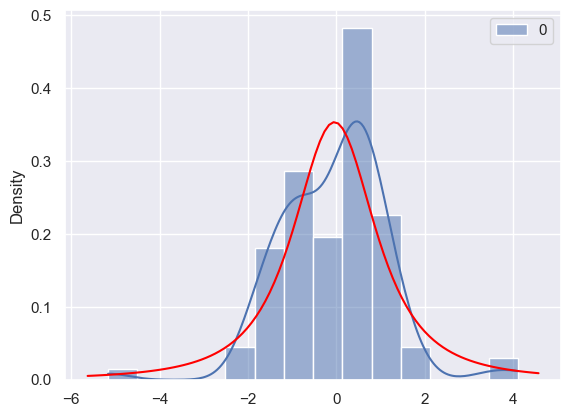

In [162]:
import math
from scipy.stats import t

def calcLogLikelihood_t(guess, true, n):
    error = true-guess
    f = 1
    for i in error:
        f = f * t.pdf(i,2)
    return np.log(f)

def myFunction_t(var):
    #   load my  data
    x = np.array(x_p2[:,1])
    y = np.array(y_p2)
    yGuess = (var[1]*x) + var[0]
    f = calcLogLikelihood_t(yGuess, y, float(len(yGuess)))
    return (-1*f)
  
nvar = 2
var = np.zeros(nvar)
var[0] = 0
var[1] = 1

res_t = minimize(myFunction_t, var, method='BFGS',
                options={'disp': True})
print(res_t.x)

error_vector_mle_t = y_p2 - x_p2 * np.matrix(res_t.x).T
# plot the histgram
hist_plot = sb.histplot(error_vector_mle_t, kde = True, stat="density")
# plot normal distribution
xmin, xmax = hist_plot.get_xlim()
t_x = np.linspace(xmin, xmax, 100)
hist_plot.plot(t_x, t.pdf(normal_x,2), color = 'red')
#y_p2 - x_p2 * np.matrix(res.x).T

Optimization terminated successfully.
         Current function value: 159.992097
         Iterations: 5
         Function evaluations: 24
         Gradient evaluations: 8


C:\Users\WANGLIN CAI\AppData\Local\Temp\ipykernel_39248\449747075.py:58: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


Optimization terminated successfully.
         Current function value: 162.272623
         Iterations: 5
         Function evaluations: 24
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 155.902859
         Iterations: 5
         Function evaluations: 24
         Gradient evaluations: 8


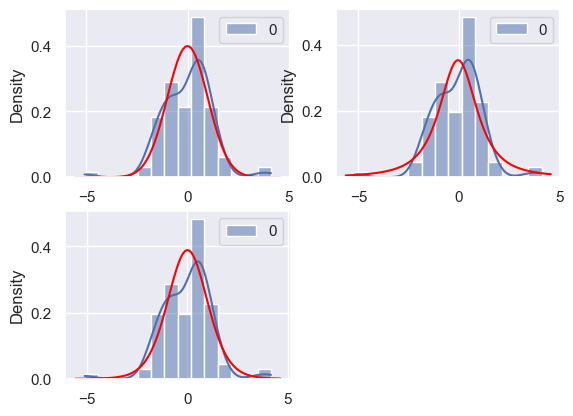

In [178]:
dataset_p2 = pd.read_csv('problem2.csv')
# get first column equals to 1
dataset_p2.insert(loc=0,column='1',value=1)

############################ OLS method
# convert dataset into matrix
x_p2 = np.matrix(dataset_p2.iloc[:,0:2])
y_p2 = np.matrix(dataset_p2.iloc[:,2:3])

# calculation
beta_hat = np.linalg.inv(x_p2.T * x_p2) * x_p2.T * y_p2
y_predict = x_p2 * beta_hat
error_vector_ols = y_p2 - y_predict

# plot the histgram
hist_plot = sb.histplot(error_vector_ols, kde = True, stat="density")
# plot normal distribution
xmin, xmax = hist_plot.get_xlim()
normal_x = np.linspace(xmin, xmax, 100)
hist_plot.plot(normal_x, norm.pdf(normal_x), color = 'red')
# looks like it is not a normal distribution

# test if the error is normal distributed or not
normaltest(error_vector_ols)
# the results show that it is not from a normal distribution


############################# MLE Method

################# normal
def calcLogLikelihood_normal(guess, true, n):
    error = true-guess
    sigma = np.std(error)
    f = ((1/(2 * math.pi*sigma*sigma))**(n/2))* \
        np.exp(-1*((np.dot(error.T,error))/(2*sigma*sigma)))
    return np.log(f)

def myFunction_normal(var):
    #   load my  data
    x = np.array(x_p2[:,1])
    y = np.array(y_p2)
    yGuess = (var[1]*x) + var[0]
    f = calcLogLikelihood_normal(yGuess, y, float(len(yGuess)))
    return (-1*f)

#  Let's pick some random starting points for the optimization    
nvar = 2
var = np.zeros(nvar)
var[0] = 0
var[1] = 1

#   let's maximize the likelihood (minimize -1*max(likelihood)
res_normal = minimize(myFunction_normal, var, method='BFGS',
                options={'disp': True})

error_vector_mle_normal = y_p2 - x_p2 * np.matrix(res_normal.x).T
# plot the histgram
plt.subplot(2, 2, 1)
hist_plot = sb.histplot(error_vector_mle_normal, kde = True, stat="density")
# plot normal distribution
xmin, xmax = hist_plot.get_xlim()
normal_x = np.linspace(xmin, xmax, 100)
hist_plot.plot(normal_x, norm.pdf(normal_x), color = 'red')
# looks like it is not a normal distribution

# test if the error is normal distributed or not
normaltest(error_vector_mle_normal)
# the results show that it is not from a normal distribution


################# t distribution
def calcLogLikelihood_t(guess, true, n):
    error = true-guess
    f = 1
    for i in error:
        f = f * t.pdf(i,n)
    return np.log(f)

def myFunction_t_2(var):
    #   load my  data
    x = np.array(x_p2[:,1])
    y = np.array(y_p2)
    yGuess = (var[1]*x) + var[0]
    f = calcLogLikelihood_t(yGuess, y, 2)
    return (-1*f)

def myFunction_t_10(var):
    #   load my  data
    x = np.array(x_p2[:,1])
    y = np.array(y_p2)
    yGuess = (var[1]*x) + var[0]
    f = calcLogLikelihood_t(yGuess, y, 10)
    return (-1*f)

#  Let's pick some random starting points for the optimization    
nvar = 2
var = np.zeros(nvar)
var[0] = 0
var[1] = 1

######################### t = 2
#   let's maximize the likelihood (minimize -1*max(likelihood)
res_t_2 = minimize(myFunction_t_2, var, method='BFGS',
                options={'disp': True})
res_t_2.x

error_vector_mle_t_2 = y_p2 - x_p2 * np.matrix(res_t_2.x).T
# plot the histgram
plt.subplot(2, 2, 2)
hist_plot = sb.histplot(error_vector_mle_t_2, kde = True, stat="density")
# plot normal distribution
xmin, xmax = hist_plot.get_xlim()
t_x = np.linspace(xmin, xmax, 100)
hist_plot.plot(t_x, t.pdf(normal_x,2), color = 'red')



######################## t = 10
#   let's maximize the likelihood (minimize -1*max(likelihood)
res_t_10 = minimize(myFunction_t_10, var, method='BFGS',
                options={'disp': True})
res_t_10.x

error_vector_mle_t_10 = y_p2 - x_p2 * np.matrix(res_t_10.x).T
# plot the histgram
plt.subplot(2, 2, 3)
hist_plot = sb.histplot(error_vector_mle_t_10, kde = True, stat="density")
# plot normal distribution
xmin, xmax = hist_plot.get_xlim()
t_x = np.linspace(xmin, xmax, 100)
hist_plot.plot(t_x, t.pdf(normal_x,10), color = 'red')


# goodness of fit
ss_total = 0
for i in y_p2:
    ss_total += (i[0,0]-np.mean(y_p2))**2

r_squared_normal = 1 - np.dot(error_vector_mle_normal.T, error_vector_mle_normal)/ss_total
r_squared_t_2 = 1 - np.dot(error_vector_mle_t_2.T, error_vector_mle_t_2)/ss_total
r_squared_t_10 = 1 - np.dot(error_vector_mle_t_10.T, error_vector_mle_t_10)/ss_total

In [175]:
print(r_squared_normal)
print(r_squared_t_2)
print(r_squared_t_10)

[[0.19463952]]
[[0.19088893]]
[[0.19361679]]


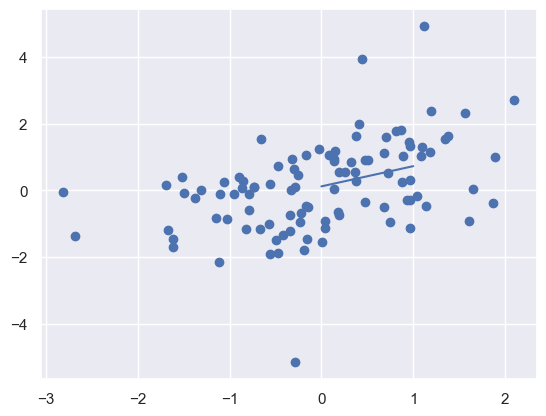

In [123]:
a = plt.scatter(dataset_p2.iloc[:,1:2],dataset_p2.iloc[:,2:3])
([0,1],[0.1198,0.725])

In [177]:
np.dot(error_vector_mle_normal.T, error_vector_mle_normal)[0,0]

143.6148485406262

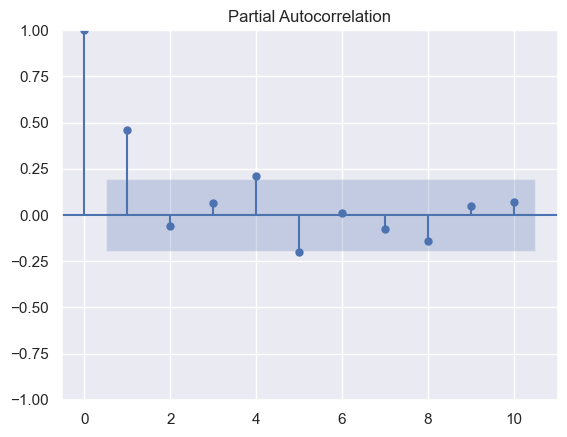

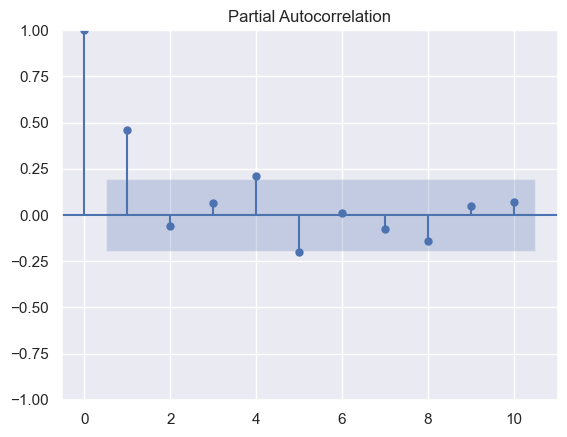

In [188]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
np.random.seed(1)
ar1_data = np.random.randn(100)
for i in range(1, 100):
    ar1_data[i] = 0.6 * ar1_data[i-1] + np.random.randn()

# Plot the ACF and PACF for AR(1)
#plot_acf(ar1_data, lags=10)
plot_pacf(ar1_data, lags=10)

In [189]:
data1 = np.random.normal(0, 1, 100)
data2 = np.random.normal(0, 1, 1000)


# calculate the skewness using its original definition
def skew_cal(data):
    count = 0
    m = np.mean(data)
    for i in data:
        count += (i - m)**3/len(data)
    count = count/(np.std(data)**3)
    return count

print(skew_cal(data1))
print(skew_cal(data2))

print(skew(data1))
print(skew(data2))

# calculate the difference
skew_result1 = skew_cal(data1) - skew(data1)
skew_result2 = skew_cal(data2) - skew(data2)

print(skew_result1)
print(skew_result2)

0.12287945251448877
-0.04267377234169612
0.12287945251448874
-0.042673772341696066
2.7755575615628914e-17
-5.551115123125783e-17


In [190]:
def kurtosis_cal(data):
    count = 0
    m = np.mean(data)
    for i in data:
        count += (i - m)**4/len(data)
    count = count/(np.std(data)**4)
    return count

print(kurtosis_cal(data1))
print(kurtosis_cal(data2))

print(kurtosis(data1))
print(kurtosis(data2))

# calculate the difference
kurtosis_result1 = kurtosis_cal(data1) - kurtosis(data1)
kurtosis_result2 = kurtosis_cal(data2) - kurtosis(data2)

print(kurtosis_result1)
print(kurtosis_result2)

2.7343700599028598
3.2037582065817625
-0.26562994009714025
0.20375820658176647
3.0
2.999999999999996


<AxesSubplot: ylabel='Count'>

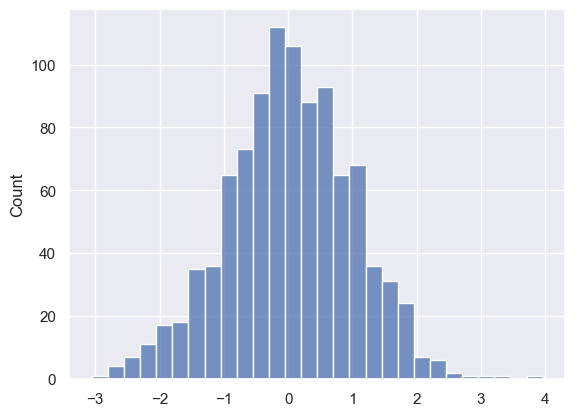

In [194]:
sb.histplot(data2)